<a href="https://colab.research.google.com/github/rizalagussaini/telco_churn_app/blob/main/%231%20churn_Adel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64


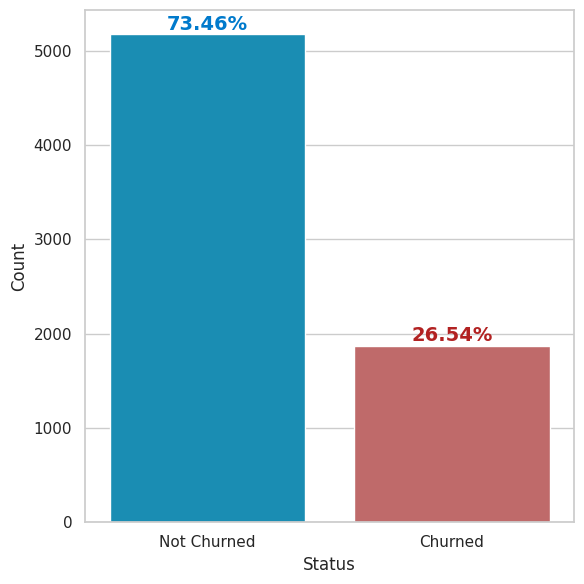

In [ ]:
# Hitung jumlah dan persentase
print(df['Churn'].value_counts())

count = df['Churn'].value_counts()
percent = df['Churn'].value_counts(normalize=True) * 100

labels = ['Not Churned' if val == 'No' else 'Churned' for val in count.index]

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=count.values, hue=labels, palette=['#009ACD', '#CD5C5C'], legend=False)

for i, p in enumerate(count.values):
    percentage = f"{percent.iloc[i]:.2f}%"
    color = '#007ACC' if labels[i] == 'Not Churned' else '#B22222'
    plt.text(i, p + 50, percentage, ha='center', color=color, fontsize=14, fontweight='bold')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('')
plt.tight_layout()
plt.show()

In [ ]:
# Distribusi dari setiap fitur dengan Churn.
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

Error in callback <function flush_figures at 0x7d0d82ac8b80> (for post_execute):


KeyboardInterrupt: 

# Preprocessing

In [ ]:
# Create a copy of base data for manupulation & processing
telco_data = df.copy()

In [ ]:
# Encode 'TotalCharges' and 'Churn'
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data['Churn'] = telco_data['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
# check missing values
telco_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# handling 'TotalCharges' missing values
telco_data.dropna(how='any', inplace=True)

In [ ]:
# drop irrelevant columns
telco_data.drop(columns=['customerID'], inplace=True)

In [ ]:
# check 'tenure' max value
print(telco_data['tenure'].max())

72


In [ ]:
# making a gorup of tenure in range of 12 months each
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [ ]:
# encode all categorical columns
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [ ]:
telco_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-nul

In [ ]:
# convert all bool columns to numeric
bool_cols = telco_data_dummies.select_dtypes(include='bool').columns
telco_data_dummies[bool_cols] = telco_data_dummies[bool_cols].astype(int)

In [ ]:
telco_data_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


<Axes: >

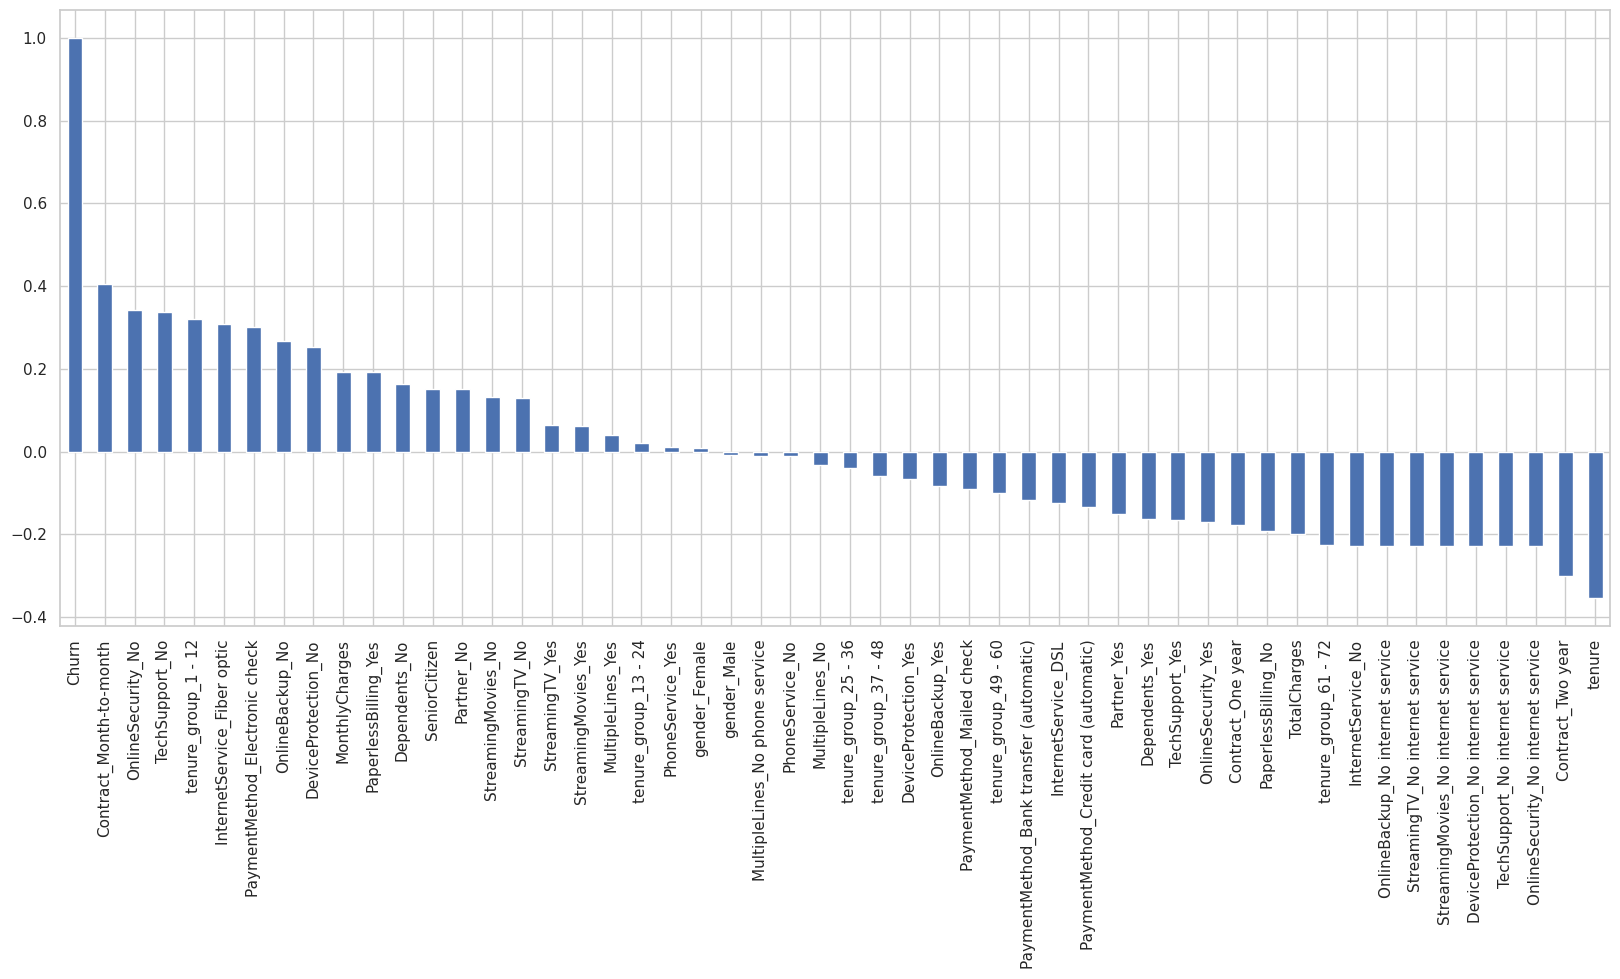

In [ ]:
# Check features correlation with 'Churn'
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# drop irrelevant columns based on correlation result
telco_data_dummies.drop(columns=['gender_Male', 'gender_Female', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'MultipleLines_No phone service'], inplace=True)

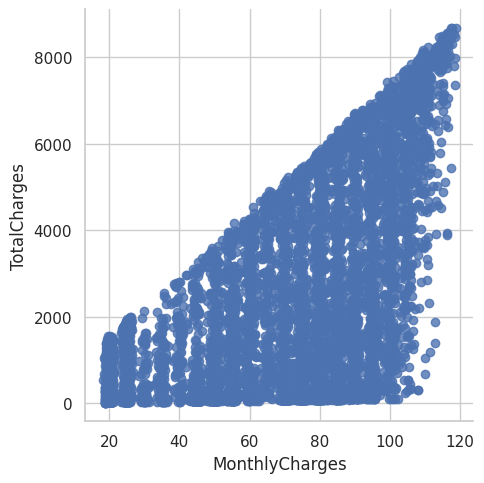

In [ ]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'TotalCharges by churn')

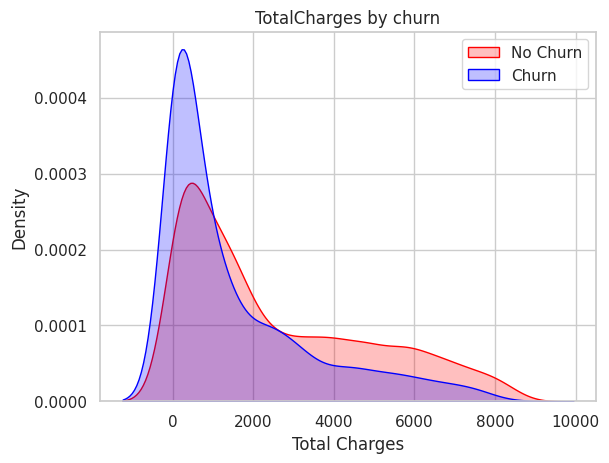

In [ ]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0)], color="Red", fill=True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1)], ax=Tot, color="Blue", fill=True)

Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('TotalCharges by churn')

In [ ]:
telco_data_dummies.to_csv('tel_churn.csv')

In [ ]:
# Import metrics evaluation from scikit-learn
from sklearn.model_selection import train_test_split

# handling imbalance
from imblearn.combine import SMOTEENN

In [ ]:
# load dataset
df = pd.read_csv("tel_churn.csv")
df

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,29.85,29.85,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,34,56.95,1889.50,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,2,53.85,108.15,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,0,45,42.30,1840.75,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,24,84.80,1990.50,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,72,103.20,7362.90,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,11,29.60,346.45,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,4,74.40,306.60,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# delete 'Churn' from the dataset and set it as a target column
x = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# dataset test train split (80:20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# handling class imbalance with SMOTEENN
sm = SMOTEENN(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

In [ ]:
print("Before SMOTEENN:", y_train.value_counts())
print("After SMOTEENN:", y_resampled.value_counts())

Before SMOTEENN: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTEENN: Churn
1    2556
0    2132
Name: count, dtype: int64


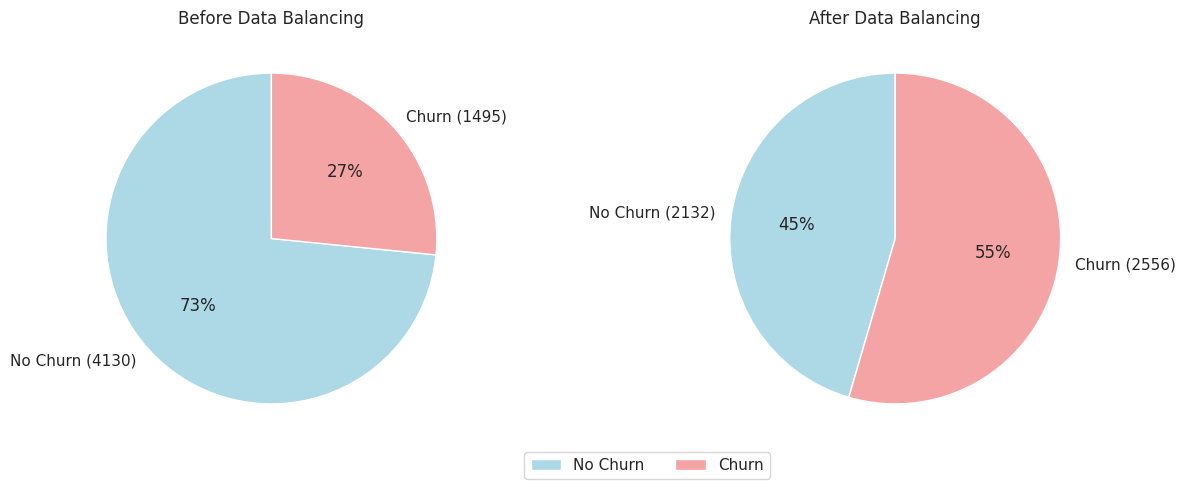

In [ ]:
before_counts = y_train.value_counts().sort_index()
after_counts = y_resampled.value_counts().sort_index()

# Label dan warna berdasarkan urutan yang benar (misal No = 0, Yes = 1)
labels = ['No Churn', 'Churn']
colors = ['#ADD8E6', '#F4A4A4']  # biru muda dan peach

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart before balancing
axes[0].pie(
    before_counts,
    labels=[f'{labels[i]} ({before_counts.iloc[i]})' for i in range(2)],
    colors=colors,
    autopct='%1.0f%%',
    startangle=90
)
axes[0].set_title('Before Data Balancing')

# Pie chart after balancing
axes[1].pie(
    after_counts,
    labels=[f'{labels[i]} ({after_counts.iloc[i]})' for i in range(2)],
    colors=colors,
    autopct='%1.0f%%',
    startangle=90
)
axes[1].set_title('After Data Balancing')

plt.legend(labels, loc='lower center', bbox_to_anchor=(-0.1, -0.1), ncol=2)
plt.tight_layout()
plt.show()


# Model Training

In [ ]:
# Import matrix library
from sklearn import metrics # Import the metrics module
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Import model Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Membagi dataset yang telah di-resample menjadi data training dan testing
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

## DesicionTreeClssifier

In [ ]:
model_dt = DecisionTreeClassifier(
    criterion="gini",
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

In [ ]:
# Train dt model with the resampled data train
model_dt.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
# Memprediksi hasil menggunakan model yang telah dilatih
yr_dt_pred = model_dt.predict(xr_test)

In [ ]:
# Mengukur akurasi model terhadap data uji
model_score_dt = model_dt.score(xr_test, yr_test)

# Menampilkan skor akurasi model
print("Model Score:", model_score_dt, "\n")

# Menampilkan confusion matrix untuk membandingkan hasil prediksi dengan label sebenarnya
print("Confusion Matrix:")
print(metrics.confusion_matrix(yr_test, yr_dt_pred), "\n")

# Menampilkan laporan klasifikasi untuk melihat metrik evaluasi seperti precision, recall, dan f1-score
print("Classification Report:")
print(metrics.classification_report(yr_test, yr_dt_pred), "\n")

Model Score: 0.9392324093816631 

Confusion Matrix:
[[363  37]
 [ 20 518]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       400
           1       0.93      0.96      0.95       538

    accuracy                           0.94       938
   macro avg       0.94      0.94      0.94       938
weighted avg       0.94      0.94      0.94       938
 



## RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

In [ ]:
# Melatih model Random Forest yang telah dibuat dengan data latih hasil resampling
model_rf.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
# Memprediksi hasil menggunakan model yang telah dilatih
yr_rf_pred = model_rf.predict(xr_test)

In [ ]:
# Mengukur akurasi model terhadap data uji
model_score_rf = model_rf.score(xr_test, yr_test)

# Menampilkan skor akurasi model
print("Model Score:", model_score_rf, "\n")

# Menampilkan confusion matrix untuk membandingkan hasil prediksi dengan label sebenarnya
print("Confusion Matrix:")
print(metrics.confusion_matrix(yr_test, yr_rf_pred), "\n")

# Menampilkan laporan klasifikasi untuk melihat metrik evaluasi seperti precision, recall, dan f1-score
print("Classification Report:")
print(metrics.classification_report(yr_test, yr_rf_pred), "\n")

Model Score: 0.9434968017057569 

Confusion Matrix:
[[364  36]
 [ 17 521]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       400
           1       0.94      0.97      0.95       538

    accuracy                           0.94       938
   macro avg       0.95      0.94      0.94       938
weighted avg       0.94      0.94      0.94       938
 



## XGBoost

In [ ]:
model_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=100,
    min_child_weight=8,
    objective='binary:logistic'
)

In [ ]:
# Melatih model XGBoost (model_xgb_smote) menggunakan data latih yang telah di-resample (xr_train2 dan yr_train2)
model_xgb.fit(xr_train,yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [ ]:
# Menggunakan model XGBoost yang telah dilatih (model_xgb_smote) untuk membuat prediksi
yr_xgb_pred = model_xgb.predict(xr_test)

In [ ]:
# Mengukur akurasi model terhadap data uji
model_score_xgb = model_xgb.score(xr_test, yr_test)

# Menampilkan skor akurasi model
print("Model Score:", model_score_xgb, "\n")

# Menampilkan confusion matrix untuk membandingkan hasil prediksi dengan label sebenarnya
print("Confusion Matrix:")
print(metrics.confusion_matrix(yr_test, yr_xgb_pred), "\n")

# Menampilkan laporan klasifikasi untuk melihat metrik evaluasi seperti precision, recall, dan f1-score
print("Classification Report:")
print(metrics.classification_report(yr_test, yr_xgb_pred), "\n")

Model Score: 0.9605543710021321 

Confusion Matrix:
[[386  14]
 [ 23 515]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       400
           1       0.97      0.96      0.97       538

    accuracy                           0.96       938
   macro avg       0.96      0.96      0.96       938
weighted avg       0.96      0.96      0.96       938
 



## Choose Best Model

In [ ]:
# Menunjukkan skor akurasi untuk tiga model yang telah dilatih dan di-resample menggunakan SMOTEENN
print("Decision Tree Classifier : ", model_score_dt)
print("Random Forest Classifier :", model_score_rf)
print("XGBoost Classifier       : ", model_score_xgb)

Decision Tree Classifier :  0.9392324093816631
Random Forest Classifier : 0.9434968017057569
XGBoost Classifier       :  0.9605543710021321


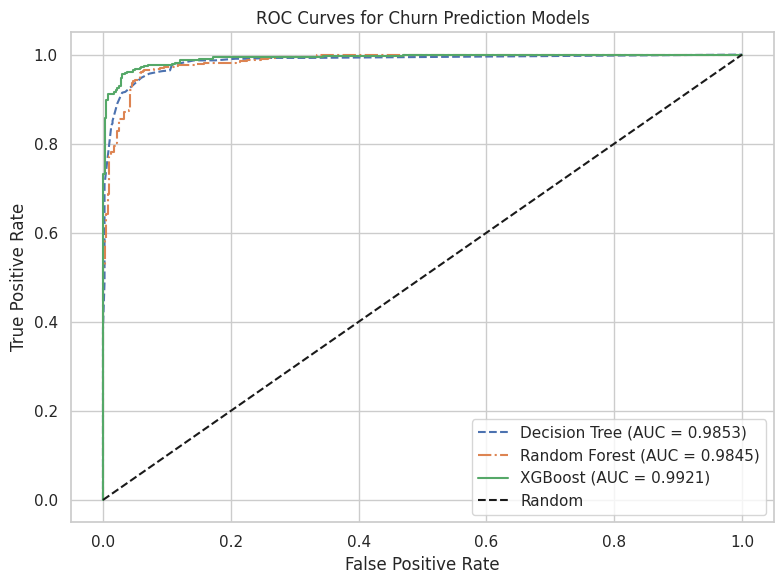

In [ ]:
# 1. Probabilitas prediksi untuk masing-masing model
y_dt_proba = model_dt.predict_proba(xr_test)[:, 1]
y_rf_proba = model_rf.predict_proba(xr_test)[:, 1]
y_xgb_proba = model_xgb.predict_proba(xr_test)[:, 1]

# 2. Hitung fpr dan tpr
fpr_dt, tpr_dt, _ = roc_curve(yr_test, y_dt_proba)
fpr_rf, tpr_rf, _ = roc_curve(yr_test, y_rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(yr_test, y_xgb_proba)

# 3. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(yr_test, y_dt_proba):.4f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(yr_test, y_rf_proba):.4f})', linestyle='-.')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(yr_test, y_xgb_proba):.4f})', linestyle='-')

# 4. Garis baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# 5. Label dan tampilan
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Churn Prediction Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

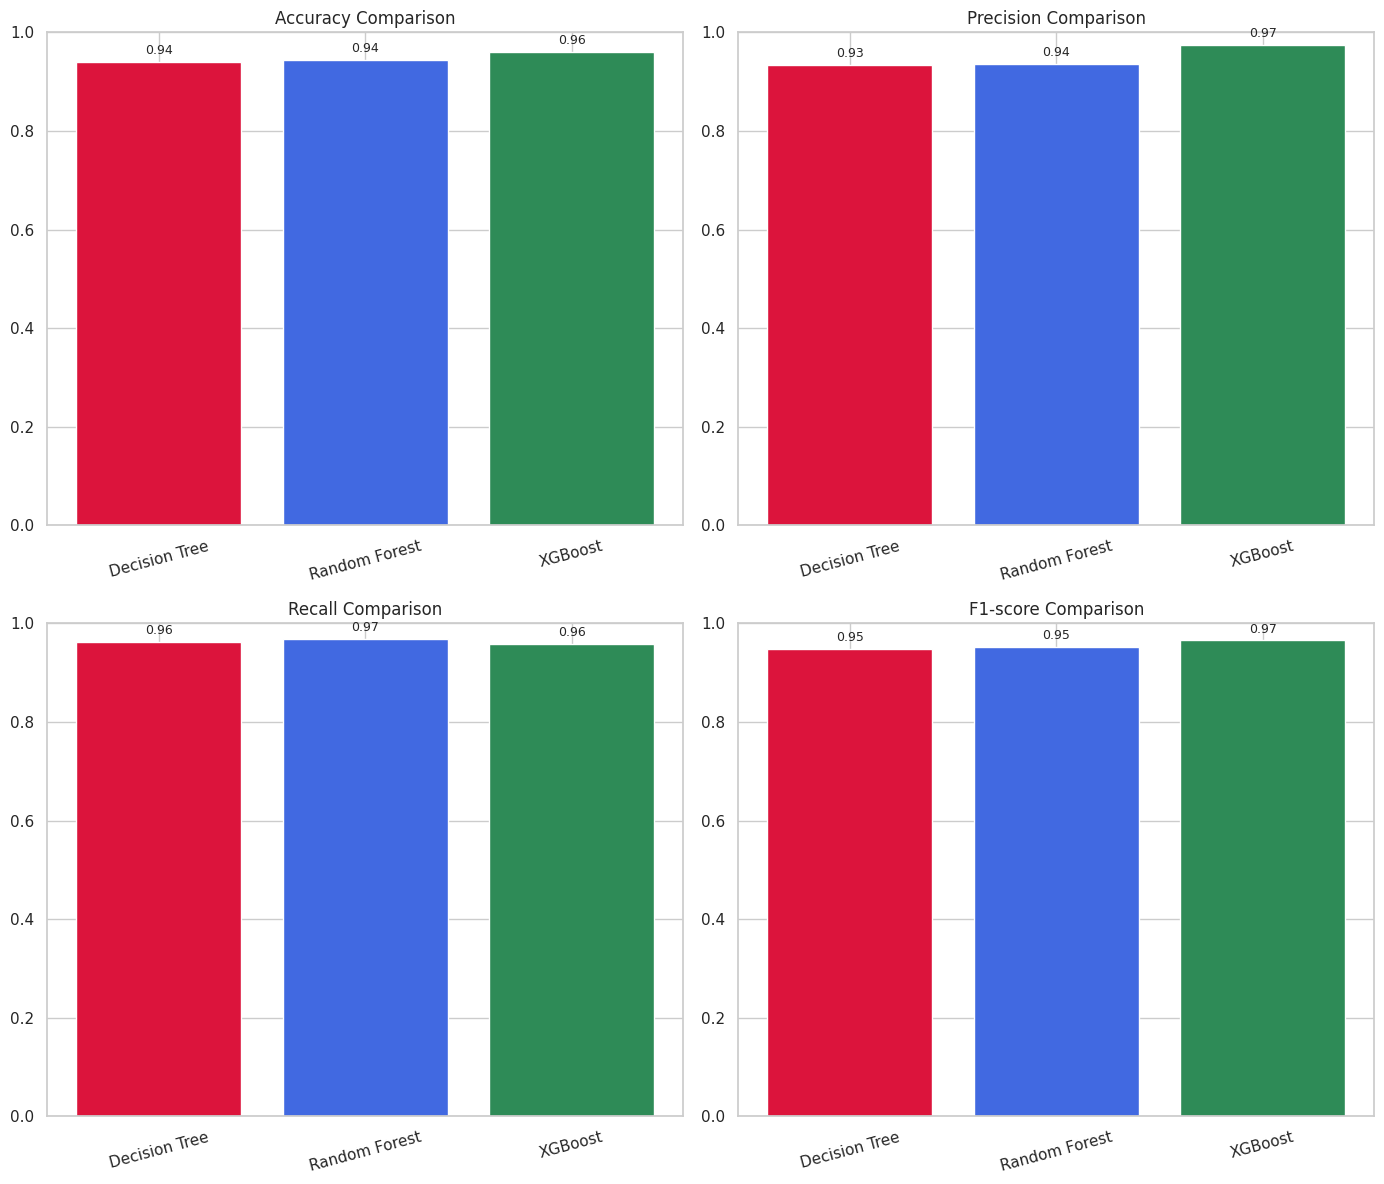

In [ ]:
from sklearn.metrics import accuracy_score

model_scores = {}

# Decision Tree
yr_dt_pred = model_dt.predict(xr_test)
report_dt = classification_report(yr_test, yr_dt_pred, output_dict=True)
acc_dt = accuracy_score(yr_test, yr_dt_pred)
model_scores['Decision Tree'] = {
    'Accuracy': acc_dt,
    'Precision': report_dt['1']['precision'],
    'Recall': report_dt['1']['recall'],
    'F1-score': report_dt['1']['f1-score']
}

# Random Forest
yr_rf_pred = model_rf.predict(xr_test)
report_rf = classification_report(yr_test, yr_rf_pred, output_dict=True)
acc_rf = accuracy_score(yr_test, yr_rf_pred)
model_scores['Random Forest'] = {
    'Accuracy': acc_rf,
    'Precision': report_rf['1']['precision'],
    'Recall': report_rf['1']['recall'],
    'F1-score': report_rf['1']['f1-score']
}

# XGBoost
yr_xgb_pred = model_xgb.predict(xr_test)
report_xgb = classification_report(yr_test, yr_xgb_pred, output_dict=True)
acc_xgb = accuracy_score(yr_test, yr_xgb_pred)
model_scores['XGBoost'] = {
    'Accuracy': acc_xgb,
    'Precision': report_xgb['1']['precision'],
    'Recall': report_xgb['1']['recall'],
    'F1-score': report_xgb['1']['f1-score']
}

# Ubah dict ke DataFrame
df_scores = pd.DataFrame(model_scores).T

# Buat bar plot per metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(df_scores.index, df_scores[metric], color=['#DC143C', '#4169E1', '#2E8B57'])
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    for idx, val in enumerate(df_scores[metric]):
        plt.text(idx, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

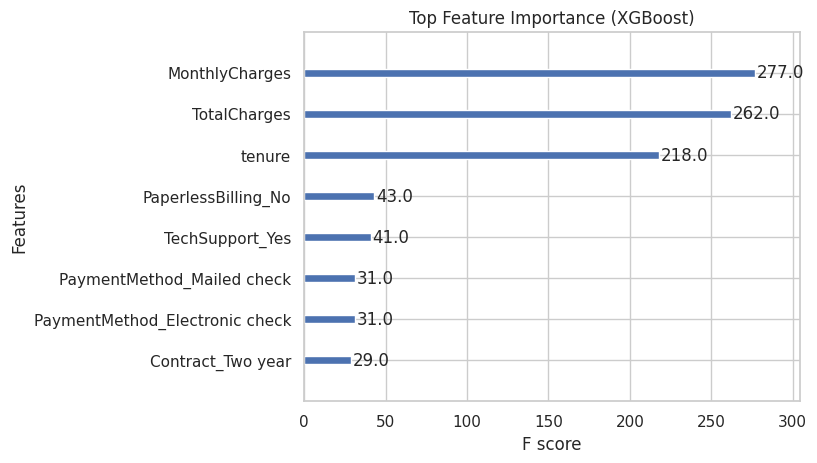

In [ ]:
# Feature Importance Plot
import xgboost
xgboost.plot_importance(model_xgb, max_num_features=8) # Use xgboost.plot_importance instead of model_xgb.plot_importance
plt.title('Top Feature Importance (XGBoost)')
plt.show()

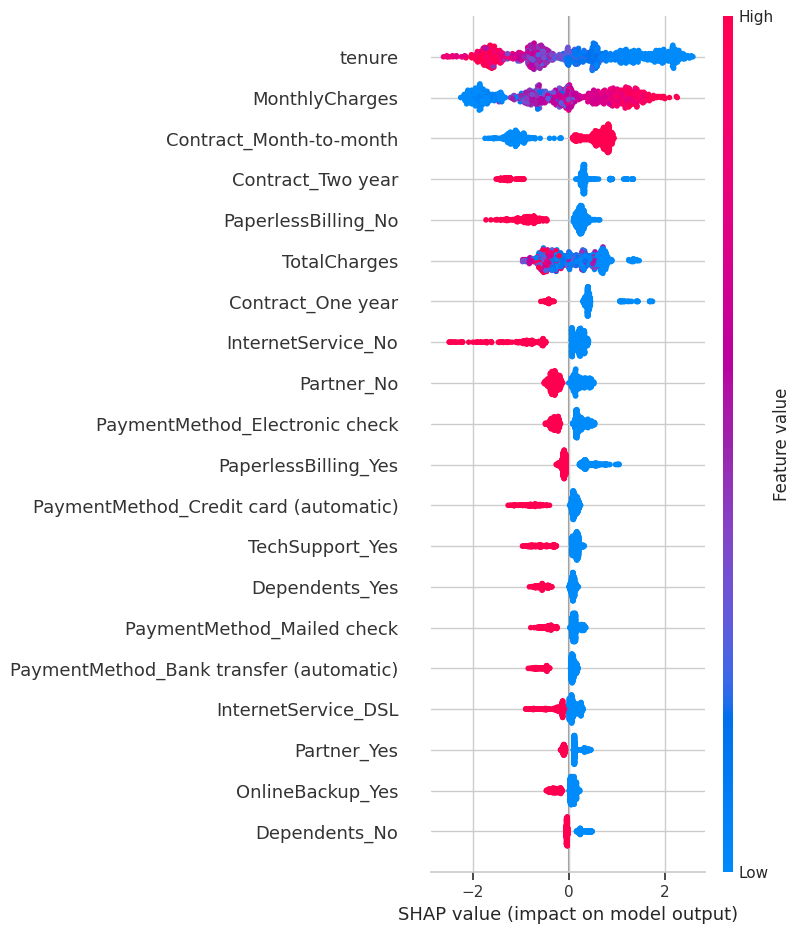

In [ ]:
# SHAP Value Visualization (Opsional, Bonus)
import shap
explainer = shap.Explainer(model_xgb)
shap_values = explainer(xr_test)

shap.summary_plot(shap_values, xr_test, feature_names=x.columns)

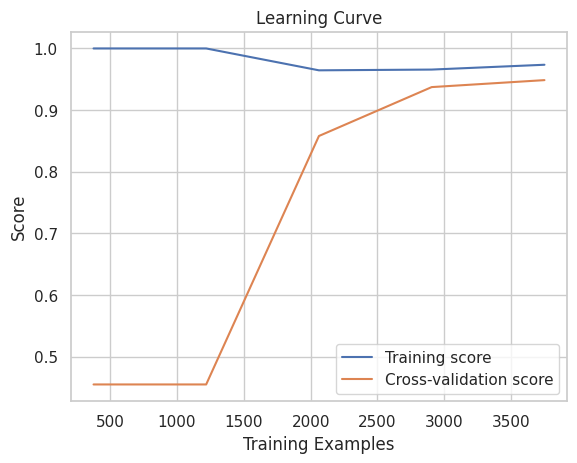

In [ ]:
=# Learning Curve (untuk tunjukkan performa model terhadap jumlah data)

from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model_xgb, x_resampled, y_resampled, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## Save Model

In [ ]:
import joblib

In [ ]:
# Menentukan nama file ('model.sav') untuk menyimpan model yang telah dilatih
filename = 'model.pkl'

joblib.dump(model_xgb, open(filename, 'wb'))
load_model = joblib.load(open(filename, 'rb'))
model_score_xgb = load_model.score(xr_test, yr_test)

# Menampilkan skor evaluasi model XGBoost pada data uji
model_score_xgb

0.9605543710021321

# Data Testing

In [ ]:
# Data testing (input baru)
input_data = {
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85,
    'tenure_group': '1 - 12'  # Add tenure_group
}

# Konversi dictionary ke DataFrame
input_df = pd.DataFrame([input_data])

# Load model XGBoost yang sudah dilatih
filename = 'model.pkl'
model_xgb_smote = joblib.load(open(filename, 'rb'))

# --- Apply one-hot encoding ---
# Get all categorical features from the input data
categorical_features = input_df.select_dtypes(include=['object']).columns

# Create a DataFrame with one-hot encoded features
encoded_features = pd.get_dummies(input_df[categorical_features])

# Concatenate encoded features with numerical features
input_df = pd.concat([input_df, encoded_features], axis=1)

# Remove original categorical features
input_df = input_df.drop(columns=categorical_features)

# --- Get missing columns and add them to input_df ---
# Get the feature names from the trained model
training_features = model_xgb.get_booster().feature_names

# Find missing columns
missing_cols = set(training_features) - set(input_df.columns)

# Add missing columns with value 0
for col in missing_cols:
    input_df[col] = 0

# Reorder the columns in input_df to match training_features
input_df = input_df[training_features]
# --- End of one-hot encoding ---

# Prediksi churn atau tidak churn
prediction = model_xgb.predict(input_df)
pred_prob = model_xgb.predict_proba(input_df)

# Output hasil prediksi
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

Prediction: Churn
Prediciton Probability: [[0.01932174 0.98067826]]


In [ ]:
from google.colab import files
files.download('model.pkl')